In [1]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import pandas as pd
from functions import dirs, readFile, canonicalNames, corrMatrix, readSet
from wordEmbedders import WESCScore
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

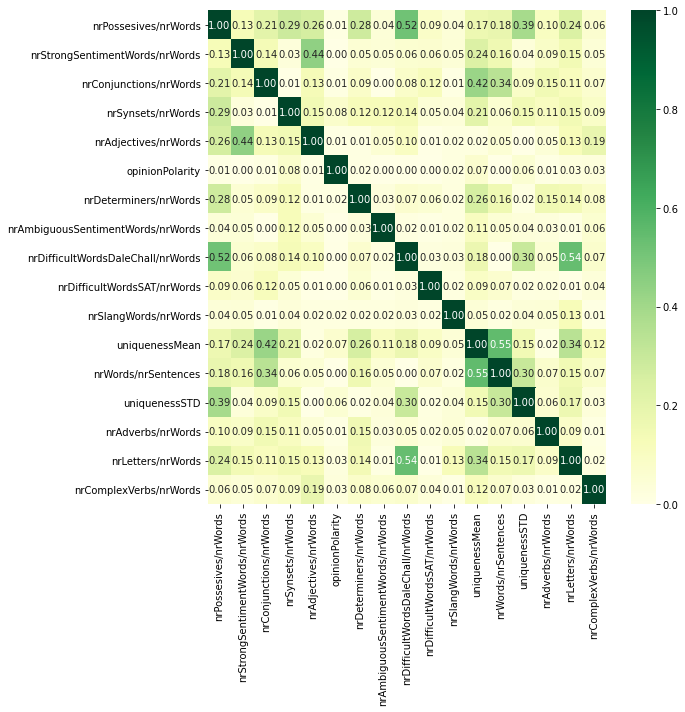

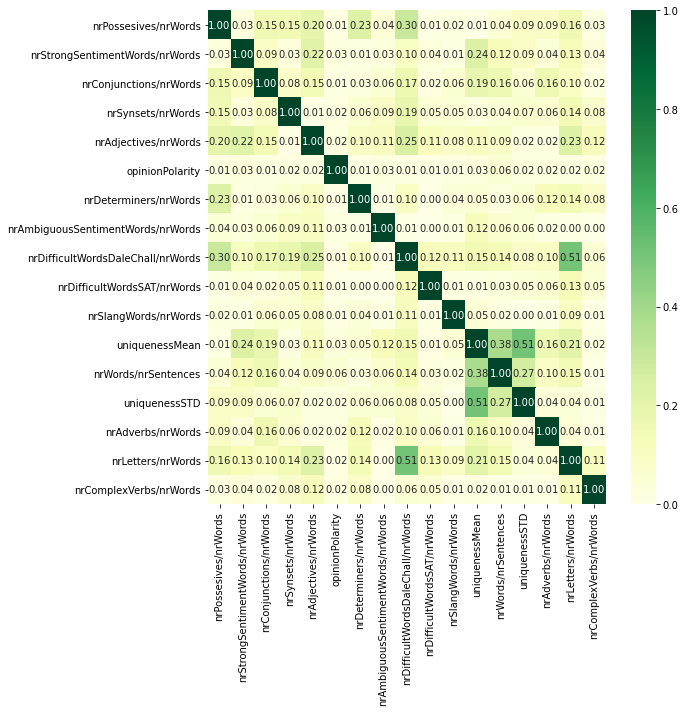

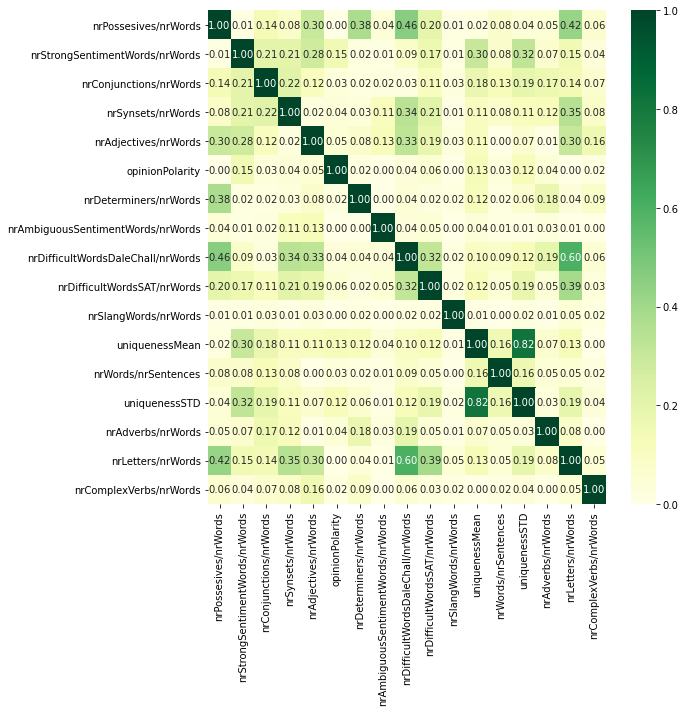

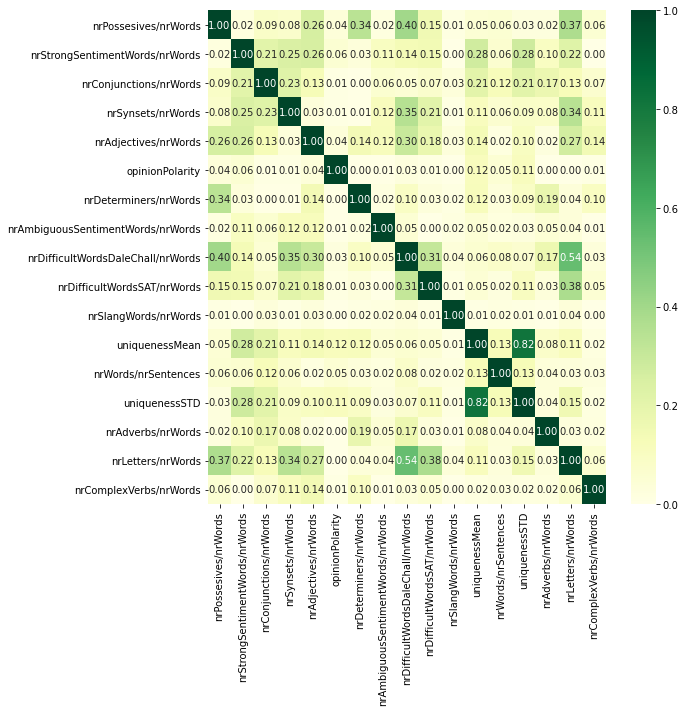

In [2]:
datasets = dirs('../data')
names = canonicalNames('../data')
picked = readSet('../data/Dimensions-Picked-Final.txt')
sentiments = ['positive', 'negative']
for dataset in datasets:
    dimsFile = f"../data/{dataset}/Dimensions.csv"
    predictionFile = f"../data/{dataset}/Word2Vec-Prediction.csv"
    dims = pd.read_csv(dimsFile)
    pred = pd.read_csv(predictionFile)
    df = dims.join(pred)
    for sentiment in sentiments:
        data = df[df['truth'] == sentiment]
        matrix = corrMatrix(data[picked])
        fig = matrix.get_figure()
        fig.patch.set_alpha(1)
        plt.tight_layout()
        fig.savefig(f'./Results-Correlation-Matrix-{dataset}-{sentiment}')